<a href="https://colab.research.google.com/github/vilsonrodrigues/DataScienceEduc/blob/master/Machine_Learning_Para_Predizer_Aprova%C3%A7%C3%A3o_Reprova%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem de dados

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt

In [0]:
nota=pd.read_csv("https://raw.githubusercontent.com/vilsonrodrigues/DataScienceEduc/master/lopNotaProvaSubmissoesLista.csv")
nota=nota.drop(columns=["Unnamed: 0"])

sub=pd.read_csv("https://github.com/vilsonrodrigues/DataScienceEduc/raw/master/lopSubmissoes.csv")
sub=sub.drop(columns=["Unnamed: 0"])

In [39]:
nota.head(1)

,idTurma,matricula,ano,idAluno,notaProva1,questoesFeitasProva1,quantidadeProva1,tituloProva1,notaProva2,questoesFeitasProva2,quantidadeProva2,tituloProva2,mediaProvas,situacao,qsub1,qsub2,qsub3,qsub4,qsub5,qsubp1,qsubp2,totalsub,igualACeml123,igualACeml45
0,598e15296d8650eb27d52e3d,2.017010e+10,2017.2,5991cd63b3c8b42f3d5da402,24.0,3.0,5.0,Prova 1 - Turma 01 - 2017.2,61.0,4.0,6.0,Prova 2 - Turma 01 - 2017.2,42.5,0,18,15,13,27,7,46,34,80,29,32


In [0]:
sub.replace(np.nan, 0, inplace=True)
sub["titulo"]=sub.titulo.astype(str)
sub=sub[(~sub["titulo"].str.contains("rova"))] 

In [41]:
sub["data"] = pd.to_datetime(sub["data"])
sub["data"] = sub["data"].dt.tz_localize(None)
sub["dia"] = sub["data"].dt.day
sub["data"].head()

0   2017-08-14 16:19:03.629
1   2017-08-14 16:19:43.260
2   2017-08-14 16:20:55.198
3   2017-08-14 16:21:53.733
4   2017-08-14 16:22:15.073
Name: data, dtype: datetime64[ns]

Criando campos para saber em que horário do dia ouve submissão



*   Madrugada = 0
*   Manhã = 1
*   Tarde = 2
*   Noite = 3





In [0]:
sub["turno"]=1
sub.loc[sub["data"].dt.hour <6, "turno"]=0
sub.loc[(sub["data"].dt.hour >12) & (sub["data"].dt.hour <=18), "turno"]=2
sub.loc[sub["data"].dt.hour >18, "turno"]=3

In [43]:
sub.head()

,ano,data,idAluno,idLista,idTurma,matricula,porcentagemAcerto,quantidade,questao,titulo,dia,turno
0,2017.2,2017-08-14 16:19:03.629,5991cd63b3c8b42f3d5da402,598cd57a3bc48946977dcf67,598e15296d8650eb27d52e3d,2.017010e+10,0.0,5.0,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,14,2
1,2017.2,2017-08-14 16:19:43.260,5991cd63b3c8b42f3d5da402,598cd57a3bc48946977dcf67,598e15296d8650eb27d52e3d,2.017010e+10,0.0,5.0,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,14,2
2,2017.2,2017-08-14 16:20:55.198,5991cd63b3c8b42f3d5da402,598cd57a3bc48946977dcf67,598e15296d8650eb27d52e3d,2.017010e+10,0.0,5.0,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,14,2
3,2017.2,2017-08-14 16:21:53.733,5991cd63b3c8b42f3d5da402,598cd57a3bc48946977dcf67,598e15296d8650eb27d52e3d,2.017010e+10,0.0,5.0,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,14,2
4,2017.2,2017-08-14 16:22:15.073,5991cd63b3c8b42f3d5da402,598cd57a3bc48946977dcf67,598e15296d8650eb27d52e3d,2.017010e+10,0.0,5.0,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,14,2


1.   Contar a quantidade de submissões nas 8 primeiras semanas
2.   Por semana, contar os dias com submissões e sem submissões
3.   Verificar o horário e dividir entre madrugada, manhã, tarde, noite

**Data de início dos semestres**



1.   2017.2  24-07-2017
2.   2018.1  19-02-2018
1.   2018.2  30-07-2018
2.   2019.1  11-02-2019





Ordenando por ano e data

In [44]:
sub.sort_values(by="data")
sub.tail(7)

,ano,data,idAluno,idLista,idTurma,matricula,porcentagemAcerto,quantidade,questao,titulo,dia,turno
23791,2018.1,2018-05-25 13:29:54.563,5ad8ac28241ada0408e6abac,59de48a4ef567721b25023a8,5ace7d50651f040f4d666d91,2.016014e+10,0.0,16.0,59c87349e7b92c7345a5f468,Lista de Exercícios 5 - Vetores,25,2
23792,2018.1,2018-05-25 13:40:18.405,5ad8ac28241ada0408e6abac,59de48a4ef567721b25023a8,5ace7d50651f040f4d666d91,2.016014e+10,0.0,16.0,59d288ddf1bbc9444e336fec,Lista de Exercícios 5 - Vetores,25,2
23793,2018.2,2018-08-21 18:51:37.735,5b7c57c99513a60408ac2eb2,59de48a4ef567721b25023a8,5ba99055463cb731d4510cba,2.018003e+10,0.0,16.0,59d26f24419e5c442b0bffbd,Lista de Exercícios 5 - Vetores,21,2
23794,2018.2,2018-08-21 19:15:46.266,5b7c57c99513a60408ac2eb2,59de48a4ef567721b25023a8,5ba99055463cb731d4510cba,2.018003e+10,33.0,16.0,59d29750dc0ada44262e5ad3,Lista de Exercícios 5 - Vetores,21,3
23795,2018.2,2018-08-21 18:51:24.069,5b7c58009513a60408ac2eb8,59de48a4ef567721b25023a8,5ba995ce463cb731d4510cdb,2.018004e+10,100.0,16.0,59d288ddf1bbc9444e336fec,Lista de Exercícios 5 - Vetores,21,2
23796,2018.2,2018-08-21 19:23:17.972,5b7c61ed9513a60408ac2f7f,59de48a4ef567721b25023a8,5ba9947f463cb731d4510cda,2.018003e+10,100.0,16.0,59d288ddf1bbc9444e336fec,Lista de Exercícios 5 - Vetores,21,3
23797,2018.2,2018-08-28 18:27:14.298,5b7c61ed9513a60408ac2f7f,59de48a4ef567721b25023a8,5ba9947f463cb731d4510cda,2.018003e+10,100.0,16.0,59d29750dc0ada44262e5ad3,Lista de Exercícios 5 - Vetores,28,2


Dias de início de cada semestre em datetime

In [45]:
d1=pd.to_datetime("2017/07/24")
d2=pd.to_datetime("2018/02/19")
d3=pd.to_datetime("2018/07/30")
d4=pd.to_datetime("2019/02/11")
d1

Timestamp('2017-07-24 00:00:00')

Função para os 4 semestres

In [0]:
def trata(sub,prov1,prov2,prov3,d):
  
  #Criando os intervalos de semanas a partir da data de início do semestre
  t=pd.Timedelta("7 days")
  d11=d+t
  d12=d11+t
  d13=d12+t
  d14=d13+t
  d15=d14+t
  d16=d15+t
  d17=d16+t
  d18=d17+t
  d19=d18+t

  #Buscando submissões entre os intervalos
  v11=sub.loc[(sub["data"]>d11) & (sub["data"]<=d12),:]
  v12=sub.loc[(sub["data"]>d12) & (sub["data"]<=d13),:]
  v13=sub.loc[(sub["data"]>d13) & (sub["data"]<=d14),:]
  v14=sub.loc[(sub["data"]>d14) & (sub["data"]<=d15),:]
  v15=sub.loc[(sub["data"]>d15) & (sub["data"]<=d16),:]
  v16=sub.loc[(sub["data"]>d16) & (sub["data"]<=d17),:]
  v17=sub.loc[(sub["data"]>d17) & (sub["data"]<=d18),:]
  v18=sub.loc[(sub["data"]>d18) & (sub["data"]<=d19),:]
  
  #Contando a quantidade de submissões dos alunos por semana
  s11 = v11.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  s11.rename(columns={"questao":"qsemana1"},inplace=True)
  s12 = v12.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  s12.rename(columns={"questao":"qsemana2"},inplace=True)
  s13 = v13.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  s13.rename(columns={"questao":"qsemana3"},inplace=True)
  s14 = v14.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  s14.rename(columns={"questao":"qsemana4"},inplace=True)
  s15 = v15.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  s15.rename(columns={"questao":"qsemana5"},inplace=True)
  s16 = v16.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  s16.rename(columns={"questao":"qsemana6"},inplace=True)
  s17 = v17.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  s17.rename(columns={"questao":"qsemana7"},inplace=True)
  s18 = v18.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  s18.rename(columns={"questao":"qsemana8"},inplace=True)
  #concatenação das tabelas
  prov1 = prov1.append(s11,sort=False,ignore_index=True)
  prov1 = prov1.append(s12,sort=False,ignore_index=True)
  prov1 = prov1.append(s13,sort=False,ignore_index=True)
  prov1 = prov1.append(s14,sort=False,ignore_index=True)
  prov1 = prov1.append(s15,sort=False,ignore_index=True)
  prov1 = prov1.append(s16,sort=False,ignore_index=True)
  prov1 = prov1.append(s17,sort=False,ignore_index=True)
  prov1 = prov1.append(s18,sort=False,ignore_index=True)
 

  #Agrupando por dia para saber a quantidade de questões submetidas pelo aluno por semana
  q11 = v11.groupby(["idAluno","dia"])["questao"].count().reset_index().sort_values(by="idAluno")
  q11 = q11.groupby(["idAluno"])["dia"].count().reset_index().sort_values(by="idAluno")
  q11.rename(columns={"dia":"submeteu1"},inplace=True)
  q12 = v12.groupby(["idAluno","dia"])["questao"].count().reset_index().sort_values(by="idAluno")
  q12 = q12.groupby(["idAluno"])["dia"].count().reset_index().sort_values(by="idAluno")
  q12.rename(columns={"dia":"submeteu2"},inplace=True)
  q13 = v13.groupby(["idAluno","dia"])["questao"].count().reset_index().sort_values(by="idAluno")
  q13 = q13.groupby(["idAluno"])["dia"].count().reset_index().sort_values(by="idAluno")
  q13.rename(columns={"dia":"submeteu3"},inplace=True)
  q14 = v14.groupby(["idAluno","dia"])["questao"].count().reset_index().sort_values(by="idAluno")
  q14 = q14.groupby(["idAluno"])["dia"].count().reset_index().sort_values(by="idAluno")
  q14.rename(columns={"dia":"submeteu4"},inplace=True)
  q15 = v15.groupby(["idAluno","dia"])["questao"].count().reset_index().sort_values(by="idAluno")
  q15 = q15.groupby(["idAluno"])["dia"].count().reset_index().sort_values(by="idAluno")
  q15.rename(columns={"dia":"submeteu5"},inplace=True)
  q16 = v16.groupby(["idAluno","dia"])["questao"].count().reset_index().sort_values(by="idAluno")
  q16 = q16.groupby(["idAluno"])["dia"].count().reset_index().sort_values(by="idAluno")
  q16.rename(columns={"dia":"submeteu6"},inplace=True)
  q17 = v17.groupby(["idAluno","dia"])["questao"].count().reset_index().sort_values(by="idAluno")
  q17 = q17.groupby(["idAluno"])["dia"].count().reset_index().sort_values(by="idAluno")
  q17.rename(columns={"dia":"submeteu7"},inplace=True)
  q18 = v18.groupby(["idAluno","dia"])["questao"].count().reset_index().sort_values(by="idAluno")
  q18 = q18.groupby(["idAluno"])["dia"].count().reset_index().sort_values(by="idAluno")
  q18.rename(columns={"dia":"submeteu8"},inplace=True)
  #concatenação das tabelas  
  prov2 = prov2.append(q11,sort=False,ignore_index=True)
  prov2 = prov2.append(q12,sort=False,ignore_index=True)
  prov2 = prov2.append(q13,sort=False,ignore_index=True)
  prov2 = prov2.append(q14,sort=False,ignore_index=True)
  prov2 = prov2.append(q15,sort=False,ignore_index=True)
  prov2 = prov2.append(q16,sort=False,ignore_index=True)
  prov2 = prov2.append(q17,sort=False,ignore_index=True)
  prov2 = prov2.append(q18,sort=False,ignore_index=True)
  
  
  #Verificando os turnos e criando um label, em seguida agrupando
  vf=sub.loc[(sub["data"]>d11) & (sub["data"]<=d19),:]
  sub0 = vf.loc[sub["turno"]==0,:]
  sub1 = vf.loc[sub["turno"]==1,:]
  sub2 = vf.loc[sub["turno"]==2,:]
  sub3 = vf.loc[sub["turno"]==3,:]
  sub0 = sub0.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  sub1 = sub1.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  sub2 = sub2.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  sub3 = sub3.groupby(["idAluno"])["questao"].count().reset_index().sort_values(by="idAluno")
  sub0.rename(columns={"questao":"madrugada"},inplace=True)
  sub1.rename(columns={"questao":"manha"},inplace=True)
  sub2.rename(columns={"questao":"tarde"},inplace=True)
  sub3.rename(columns={"questao":"noite"},inplace=True)  
  #concatenação das tabelas  
  prov3 = prov3.append(sub0,sort=False,ignore_index=True)
  prov3 = prov3.append(sub1,sort=False,ignore_index=True)
  prov3 = prov3.append(sub2,sort=False,ignore_index=True)
  prov3 = prov3.append(sub3,sort=False,ignore_index=True)

  
  return prov1,prov2,prov3

Criando um dataframe provisório para utilizar com o append

In [0]:
prov1 = pd.DataFrame()
prov2 = pd.DataFrame()
prov3 = pd.DataFrame()

prov1["idAluno"]=0
prov1["qsemana1"]=0
prov1["qsemana2"]=0
prov1["qsemana3"]=0
prov1["qsemana4"]=0
prov1["qsemana5"]=0
prov1["qsemana6"]=0
prov1["qsemana7"]=0
prov1["qsemana8"]=0
#prov1["qsemana9"]=0
#prov1["qsemana10"]=0
#prov1["qsemana11"]=0
#prov1["qsemana12"]=0
#prov1["qsemana13"]=0
#prov1["qsemana14"]=0
#prov1["qsemana15"]=0
#prov1["qsemana16"]=0

prov2["idAluno"]=0
prov2["submeteu1"]=0
prov2["submeteu2"]=0
prov2["submeteu3"]=0
prov2["submeteu4"]=0
prov2["submeteu5"]=0
prov2["submeteu6"]=0
prov2["submeteu7"]=0
prov2["submeteu8"]=0

prov3["idAluno"]=0
prov3["madrugada"]=0
prov3["manha"]=0
prov3["tarde"]=0
prov3["noite"]=0


Chamada de funções

In [0]:
prov1,prov2,prov3 = trata(sub,prov1,prov2,prov3,d1)
prov1,prov2,prov3 = trata(sub,prov1,prov2,prov3,d2)
prov1,prov2,prov3 = trata(sub,prov1,prov2,prov3,d3)
prov1,prov2,prov3 = trata(sub,prov1,prov2,prov3,d4)

In [49]:
prov1

,idAluno,qsemana1,qsemana2,qsemana3,qsemana4,qsemana5,qsemana6,qsemana7,qsemana8
0,5991cb910be9d42f2f68b906,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1,5991cd1a8907ca2f441cd313,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
2,5991cd34b3c8b42f3d5da3fd,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
3,5991cd37b3c8b42f3d5da3fe,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4,5991cd39b3c8b42f3d5da3ff,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
5,5991cd3ab3c8b42f3d5da400,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
6,5991cd3c3c13e92f349ee47a,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
7,5991cd3e8907ca2f441cd314,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
8,5991cd45b3c8b42f3d5da401,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
9,5991cd483c13e92f349ee47b,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


Limpando dados, depois agrupando para formar toda a tabela

In [50]:
prov1.replace(np.nan, 0, inplace=True)
prov2.replace(np.nan, 0, inplace=True)
prov3.replace(np.nan, 0, inplace=True)
prov1 = prov1.groupby(["idAluno"]).sum()
prov2 = prov2.groupby(["idAluno"]).sum()
prov3 = prov3.groupby(["idAluno"]).sum()
prov3.head()

,madrugada,manha,tarde,noite
idAluno,,,,
5991cb910be9d42f2f68b906,12.0,0.0,15.0,5.0
5991cd1a8907ca2f441cd313,0.0,0.0,14.0,0.0
5991cd34b3c8b42f3d5da3fd,0.0,0.0,17.0,2.0
5991cd37b3c8b42f3d5da3fe,1.0,0.0,12.0,1.0
5991cd39b3c8b42f3d5da3ff,0.0,0.0,12.0,2.0


Juntando a tabela de notas com as 3 novas tabelas

In [96]:
table=pd.merge(pd.merge(nota,prov1,on="idAluno"),pd.merge(prov2,prov3,on="idAluno"),on="idAluno")
table.head()

,idTurma,matricula,ano,idAluno,notaProva1,questoesFeitasProva1,quantidadeProva1,tituloProva1,notaProva2,questoesFeitasProva2,quantidadeProva2,tituloProva2,mediaProvas,situacao,qsub1,qsub2,qsub3,qsub4,qsub5,qsubp1,qsubp2,totalsub,igualACeml123,igualACeml45,qsemana1,qsemana2,qsemana3,qsemana4,qsemana5,qsemana6,qsemana7,qsemana8,submeteu1,submeteu2,submeteu3,submeteu4,submeteu5,submeteu6,submeteu7,submeteu8,madrugada,manha,tarde,noite
0,598e15296d8650eb27d52e3d,2.017010e+10,2017.2,5991cd63b3c8b42f3d5da402,24.0,3.0,5.0,Prova 1 - Turma 01 - 2017.2,61.000000,4.0,6.0,Prova 2 - Turma 01 - 2017.2,42.500000,0,18,15,13,27,7,46,34,80,29,32,0.0,0.0,18.0,0.0,9.0,0.0,23.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,32.0,17.0
1,598e15296d8650eb27d52e3d,2.017004e+10,2017.2,5991cb910be9d42f2f68b906,72.0,5.0,5.0,Prova 1 - Turma 01 - 2017.2,16.666667,1.0,6.0,Prova 2 - Turma 01 - 2017.2,44.333333,0,7,14,10,13,16,31,29,60,31,29,0.0,0.0,4.0,11.0,4.0,0.0,10.0,3.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,2.0,12.0,0.0,15.0,5.0
2,598e15296d8650eb27d52e3d,2.017004e+10,2017.2,599b050710b11c07650122e7,36.0,4.0,5.0,Prova 1 - Turma 01 - 2017.2,0.000000,0.0,0.0,0,18.000000,0,1,5,3,4,6,9,10,19,9,10,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0
3,598e15296d8650eb27d52e3d,2.017003e+10,2017.2,599b0509872c0a078b68b140,4.0,4.0,5.0,Prova 1 - Turma 01 - 2017.2,38.833333,4.0,6.0,Prova 2 - Turma 01 - 2017.2,21.416667,0,2,6,8,7,3,16,10,26,15,10,0.0,0.0,0.0,6.0,0.0,6.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,17.0,0.0
4,598e15296d8650eb27d52e3d,2.017011e+10,2017.2,599b0513495fac076a06d3f4,16.0,5.0,5.0,Prova 1 - Turma 01 - 2017.2,77.666667,6.0,6.0,Prova 2 - Turma 01 - 2017.2,46.833333,0,1,12,7,7,11,20,18,38,18,18,0.0,0.0,0.0,6.0,0.0,6.0,5.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,15.0,3.0


Gerando .csv

In [0]:
table.to_csv(r"lopNotaProvaSubmissoesAoLongode2semanas.csv")

# Legenda de dados



*   submeteuN == quantidade de dias em que teve submissões por semana
*   qsemanaN  == quantidade de submissões por semana







# Naive Bayes, Regressão Linear e KNN com todos os dados

Documentação do algoritmo de Naive Bayes https://www.dataquest.io/blog/sci-kit-learn-tutorial/

Esse primeiro experimento conta com os dados de submissão por semana, o número de dias diferentes que ele submeteu e a quantidade de submissão por turno

In [56]:
datasetBayes=table
datasetBayes=datasetBayes.drop(columns=["tituloProva2","tituloProva1","idAluno","ano","matricula","idTurma","igualACeml45","igualACeml123","qsub4","totalsub","qsubp2","qsubp1","qsub5","qsub3","qsub2","qsub1","mediaProvas","quantidadeProva2","questoesFeitasProva2","notaProva2","quantidadeProva1","questoesFeitasProva1","notaProva1"])
datasetBayes.head(1)

,situacao,qsemana1,qsemana2,qsemana3,qsemana4,qsemana5,qsemana6,qsemana7,qsemana8,submeteu1,submeteu2,submeteu3,submeteu4,submeteu5,submeteu6,submeteu7,submeteu8,madrugada,manha,tarde,noite
0,0,0.0,0.0,18.0,0.0,9.0,0.0,23.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,32.0,17.0


In [57]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
datasetBayes["situacao"]                       = le.fit_transform(datasetBayes["situacao"])
datasetBayes["qsemana1"]                       = le.fit_transform(datasetBayes["qsemana1"])
datasetBayes["qsemana2"]                       = le.fit_transform(datasetBayes["qsemana2"])
datasetBayes["qsemana3"]                       = le.fit_transform(datasetBayes["qsemana3"])
datasetBayes["qsemana4"]                       = le.fit_transform(datasetBayes["qsemana4"])
datasetBayes["qsemana5"]                       = le.fit_transform(datasetBayes["qsemana5"])
datasetBayes["qsemana6"]                       = le.fit_transform(datasetBayes["qsemana6"])
datasetBayes["qsemana7"]                       = le.fit_transform(datasetBayes["qsemana7"])
datasetBayes["qsemana8"]                       = le.fit_transform(datasetBayes["qsemana8"])
datasetBayes["submeteu1"]                      = le.fit_transform(datasetBayes["submeteu1"])
datasetBayes["submeteu2"]                      = le.fit_transform(datasetBayes["submeteu2"])
datasetBayes["submeteu3"]                      = le.fit_transform(datasetBayes["submeteu3"])
datasetBayes["submeteu4"]                      = le.fit_transform(datasetBayes["submeteu4"])
datasetBayes["submeteu5"]                      = le.fit_transform(datasetBayes["submeteu5"])
datasetBayes["submeteu6"]                      = le.fit_transform(datasetBayes["submeteu6"])
datasetBayes["submeteu7"]                      = le.fit_transform(datasetBayes["submeteu7"])
datasetBayes["submeteu8"]                      = le.fit_transform(datasetBayes["submeteu8"])
datasetBayes["madrugada	"]                     = le.fit_transform(datasetBayes["madrugada"])
datasetBayes["manha"]                          = le.fit_transform(datasetBayes["manha"])
datasetBayes["tarde"]                          = le.fit_transform(datasetBayes["tarde"])
datasetBayes["noite"]                          = le.fit_transform(datasetBayes["noite"])

datasetBayes.head()

,situacao,qsemana1,qsemana2,qsemana3,qsemana4,qsemana5,qsemana6,qsemana7,qsemana8,submeteu1,submeteu2,submeteu3,submeteu4,submeteu5,submeteu6,submeteu7,submeteu8,madrugada,manha,tarde,noite,madrugada
0,0,0,0,18,0,9,0,22,0,0,0,1,0,1,0,2,0,1.0,0,31,17,1
1,0,0,0,4,11,4,0,10,3,0,0,2,1,1,0,2,2,12.0,0,15,5,12
2,0,0,0,0,0,0,2,3,0,0,0,0,0,0,1,1,0,0.0,0,2,3,0
3,0,0,0,0,6,0,6,1,4,0,0,0,1,0,1,1,2,0.0,0,17,0,0
4,0,0,0,0,6,0,6,5,2,0,0,0,1,0,1,1,2,1.0,0,15,3,1


Retirando o campo Situação, porque é o que queremos prever

In [60]:
data = datasetBayes
target = datasetBayes["situacao"]
data.drop(columns=["situacao"],inplace=True)
data.head(2)

,qsemana1,qsemana2,qsemana3,qsemana4,qsemana5,qsemana6,qsemana7,qsemana8,submeteu1,submeteu2,submeteu3,submeteu4,submeteu5,submeteu6,submeteu7,submeteu8,madrugada,manha,tarde,noite,madrugada
0,0,0,18,0,9,0,22,0,0,0,1,0,1,0,2,0,1.0,0,31,17,1
1,0,0,4,11,4,0,10,3,0,0,2,1,1,0,2,2,12.0,0,15,5,12


In [0]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.5357142857142857


In [63]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.5928571428571429


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [64]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.5928571428571429


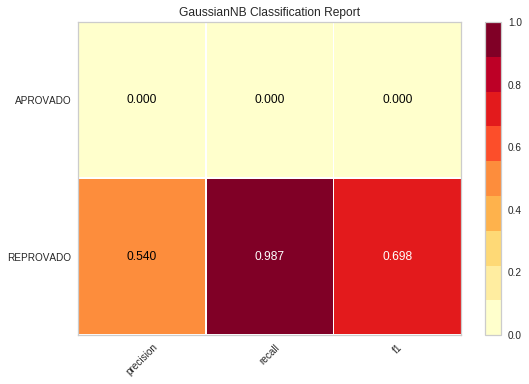

In [66]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=["REPROVADO", "APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


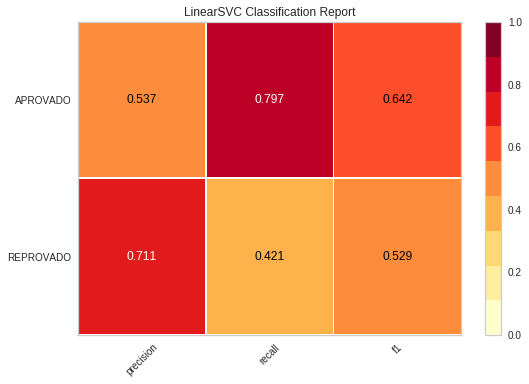

In [67]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=["REPROVADO", "APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

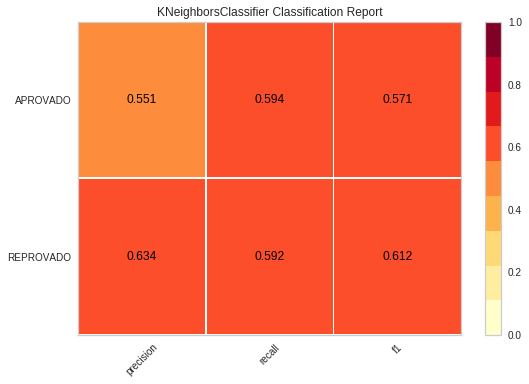

In [68]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=["REPROVADO","APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

# Naive Bayes, Regressão Linear e KNN com submissões por semana

Este segundo experimento com os dados de submissões por semana para descobrir se o aluno foi ou não aprovado

In [69]:
datasetBayes=table
datasetBayes=datasetBayes.drop(columns=["tituloProva2","tituloProva1","idAluno","ano","matricula","idTurma","igualACeml45","igualACeml123","qsub4","totalsub","qsubp2","qsubp1","qsub5","qsub3","qsub2","qsub1","mediaProvas","quantidadeProva2","questoesFeitasProva2","notaProva2","quantidadeProva1","questoesFeitasProva1","notaProva1","noite","tarde","manha","madrugada","submeteu8","submeteu7","submeteu6","submeteu5","submeteu4","submeteu3","submeteu2","submeteu1"])
datasetBayes.head(1)

,situacao,qsemana1,qsemana2,qsemana3,qsemana4,qsemana5,qsemana6,qsemana7,qsemana8
0,0,0.0,0.0,18.0,0.0,9.0,0.0,23.0,0.0


In [70]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
datasetBayes["situacao"]                       = le.fit_transform(datasetBayes["situacao"])
datasetBayes["qsemana1"]                       = le.fit_transform(datasetBayes["qsemana1"])
datasetBayes["qsemana2"]                       = le.fit_transform(datasetBayes["qsemana2"])
datasetBayes["qsemana3"]                       = le.fit_transform(datasetBayes["qsemana3"])
datasetBayes["qsemana4"]                       = le.fit_transform(datasetBayes["qsemana4"])
datasetBayes["qsemana5"]                       = le.fit_transform(datasetBayes["qsemana5"])
datasetBayes["qsemana6"]                       = le.fit_transform(datasetBayes["qsemana6"])
datasetBayes["qsemana7"]                       = le.fit_transform(datasetBayes["qsemana7"])
datasetBayes["qsemana8"]                       = le.fit_transform(datasetBayes["qsemana8"])

datasetBayes.head()

,situacao,qsemana1,qsemana2,qsemana3,qsemana4,qsemana5,qsemana6,qsemana7,qsemana8
0,0,0,0,18,0,9,0,22,0
1,0,0,0,4,11,4,0,10,3
2,0,0,0,0,0,0,2,3,0
3,0,0,0,0,6,0,6,1,4
4,0,0,0,0,6,0,6,5,2


Retirando o campo Situação, porque é o que queremos prever

In [71]:
data = datasetBayes
target = datasetBayes["situacao"]
data.drop(columns=["situacao"],inplace=True)
data.head(2)

,qsemana1,qsemana2,qsemana3,qsemana4,qsemana5,qsemana6,qsemana7,qsemana8
0,0,0,18,0,9,0,22,0
1,0,0,4,11,4,0,10,3


In [0]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.5428571428571428


In [74]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.65


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [75]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.6071428571428571


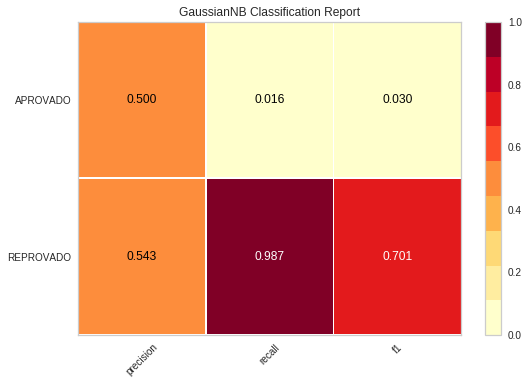

In [76]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=["REPROVADO", "APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


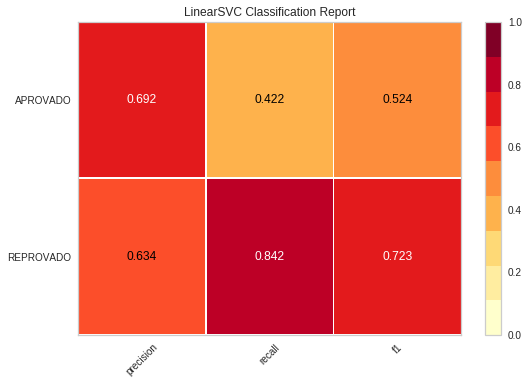

In [78]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=["REPROVADO", "APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

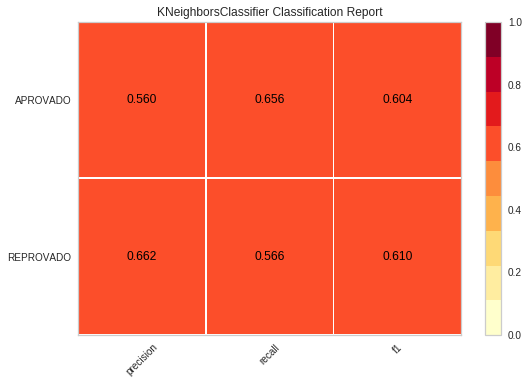

In [77]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=["REPROVADO","APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data


# Naive Bayes, Regressão Linear e KNN com submissões por semana e por turno

Neste terceiro experimento foram usado dados da quantidade de submissão por semana e por turno

In [79]:
datasetBayes=table
datasetBayes=datasetBayes.drop(columns=["tituloProva2","tituloProva1","idAluno","ano","matricula","idTurma","igualACeml45","igualACeml123","qsub4","totalsub","qsubp2","qsubp1","qsub5","qsub3","qsub2","qsub1","mediaProvas","quantidadeProva2","questoesFeitasProva2","notaProva2","quantidadeProva1","questoesFeitasProva1","notaProva1","submeteu8","submeteu7","submeteu6","submeteu5","submeteu4","submeteu3","submeteu2","submeteu1"])
datasetBayes.head(1)

,situacao,qsemana1,qsemana2,qsemana3,qsemana4,qsemana5,qsemana6,qsemana7,qsemana8,madrugada,manha,tarde,noite
0,0,0.0,0.0,18.0,0.0,9.0,0.0,23.0,0.0,1.0,0.0,32.0,17.0


In [80]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
datasetBayes["situacao"]                       = le.fit_transform(datasetBayes["situacao"])
datasetBayes["qsemana1"]                       = le.fit_transform(datasetBayes["qsemana1"])
datasetBayes["qsemana2"]                       = le.fit_transform(datasetBayes["qsemana2"])
datasetBayes["qsemana3"]                       = le.fit_transform(datasetBayes["qsemana3"])
datasetBayes["qsemana4"]                       = le.fit_transform(datasetBayes["qsemana4"])
datasetBayes["qsemana5"]                       = le.fit_transform(datasetBayes["qsemana5"])
datasetBayes["qsemana6"]                       = le.fit_transform(datasetBayes["qsemana6"])
datasetBayes["qsemana7"]                       = le.fit_transform(datasetBayes["qsemana7"])
datasetBayes["qsemana8"]                       = le.fit_transform(datasetBayes["qsemana8"])
datasetBayes["manha"]                          = le.fit_transform(datasetBayes["manha"])
datasetBayes["tarde"]                          = le.fit_transform(datasetBayes["tarde"])
datasetBayes["noite"]                          = le.fit_transform(datasetBayes["noite"])

datasetBayes.head()

,situacao,qsemana1,qsemana2,qsemana3,qsemana4,qsemana5,qsemana6,qsemana7,qsemana8,madrugada,manha,tarde,noite
0,0,0,0,18,0,9,0,22,0,1.0,0,31,17
1,0,0,0,4,11,4,0,10,3,12.0,0,15,5
2,0,0,0,0,0,0,2,3,0,0.0,0,2,3
3,0,0,0,0,6,0,6,1,4,0.0,0,17,0
4,0,0,0,0,6,0,6,5,2,1.0,0,15,3


In [81]:
data = datasetBayes
target = datasetBayes["situacao"]
data.drop(columns=["situacao"],inplace=True)
data.head(2)

,qsemana1,qsemana2,qsemana3,qsemana4,qsemana5,qsemana6,qsemana7,qsemana8,madrugada,manha,tarde,noite
0,0,0,18,0,9,0,22,0,1.0,0,31,17
1,0,0,4,11,4,0,10,3,12.0,0,15,5


In [0]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.5571428571428572


In [84]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.6


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [85]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.5714285714285714


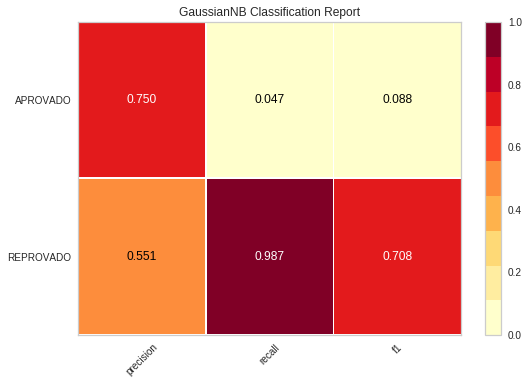

In [86]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=["REPROVADO", "APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


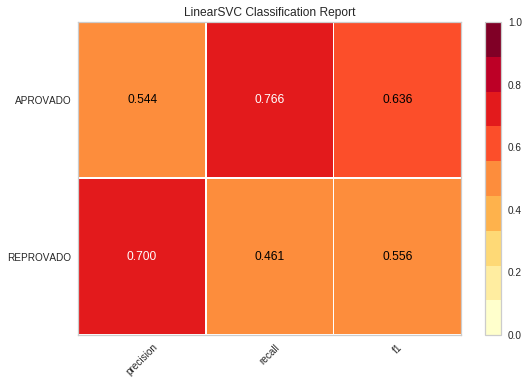

In [87]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=["REPROVADO", "APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

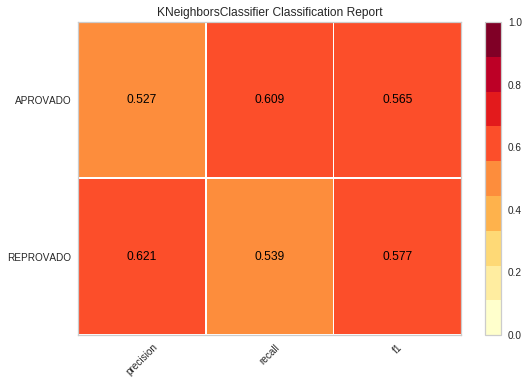

In [88]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=["REPROVADO","APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

# Naive Bayes, Regressão Linear e KNN com dias que teve submissão por semana

In [97]:
datasetBayes=table
datasetBayes=datasetBayes.drop(columns=["tituloProva2","tituloProva1","idAluno","ano","matricula","idTurma","igualACeml45","igualACeml123","qsub4","totalsub","qsubp2","qsubp1","qsub5","qsub3","qsub2","qsub1","mediaProvas","quantidadeProva2","questoesFeitasProva2","notaProva2","quantidadeProva1","questoesFeitasProva1","notaProva1","noite","tarde","manha","madrugada","qsemana1","qsemana2","qsemana3","qsemana4","qsemana5","qsemana6","qsemana7","qsemana8"])
datasetBayes.head(1)

,situacao,submeteu1,submeteu2,submeteu3,submeteu4,submeteu5,submeteu6,submeteu7,submeteu8
0,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0


In [98]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
datasetBayes["situacao"]                       = le.fit_transform(datasetBayes["situacao"])
datasetBayes["submeteu1"]                      = le.fit_transform(datasetBayes["submeteu1"])
datasetBayes["submeteu2"]                      = le.fit_transform(datasetBayes["submeteu2"])
datasetBayes["submeteu3"]                      = le.fit_transform(datasetBayes["submeteu3"])
datasetBayes["submeteu4"]                      = le.fit_transform(datasetBayes["submeteu4"])
datasetBayes["submeteu5"]                      = le.fit_transform(datasetBayes["submeteu5"])
datasetBayes["submeteu6"]                      = le.fit_transform(datasetBayes["submeteu6"])
datasetBayes["submeteu7"]                      = le.fit_transform(datasetBayes["submeteu7"])
datasetBayes["submeteu8"]                      = le.fit_transform(datasetBayes["submeteu8"])

datasetBayes.head()

,situacao,submeteu1,submeteu2,submeteu3,submeteu4,submeteu5,submeteu6,submeteu7,submeteu8
0,0,0,0,1,0,1,0,2,0
1,0,0,0,2,1,1,0,2,2
2,0,0,0,0,0,0,1,1,0
3,0,0,0,0,1,0,1,1,2
4,0,0,0,0,1,0,1,1,2


In [99]:
data = datasetBayes
target = datasetBayes["situacao"]
data.drop(columns=["situacao"],inplace=True)
data.head(2)

,submeteu1,submeteu2,submeteu3,submeteu4,submeteu5,submeteu6,submeteu7,submeteu8
0,0,0,1,0,1,0,2,0
1,0,0,2,1,1,0,2,2


In [0]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.5357142857142857


In [102]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.6071428571428571


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [103]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.6357142857142857


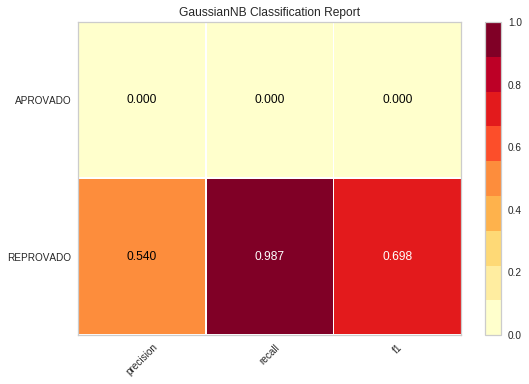

In [106]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=["REPROVADO", "APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

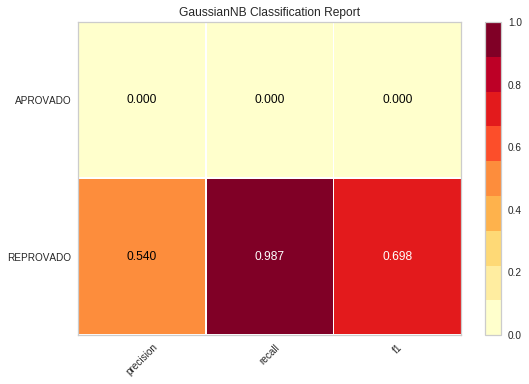

In [105]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=["REPROVADO", "APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

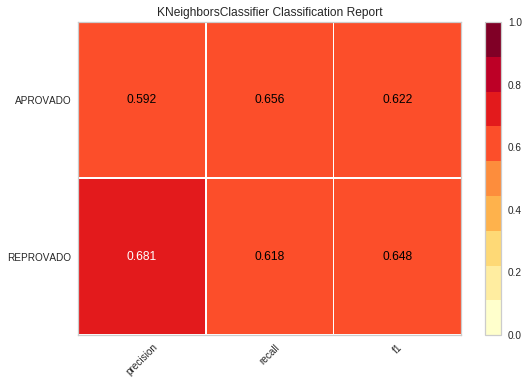

In [104]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=["REPROVADO","APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

# Naive Bayes, Regressão Linear e KNN com dias que teve submissão por semana e turno em que aluno submeteu

In [107]:
datasetBayes=table
datasetBayes=datasetBayes.drop(columns=["tituloProva2","tituloProva1","idAluno","ano","matricula","idTurma","igualACeml45","igualACeml123","qsub4","totalsub","qsubp2","qsubp1","qsub5","qsub3","qsub2","qsub1","mediaProvas","quantidadeProva2","questoesFeitasProva2","notaProva2","quantidadeProva1","questoesFeitasProva1","notaProva1","qsemana1","qsemana2","qsemana3","qsemana4","qsemana5","qsemana6","qsemana7","qsemana8"])
datasetBayes.head(1)

,situacao,submeteu1,submeteu2,submeteu3,submeteu4,submeteu5,submeteu6,submeteu7,submeteu8,madrugada,manha,tarde,noite
0,0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,32.0,17.0


In [108]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
datasetBayes["situacao"]                       = le.fit_transform(datasetBayes["situacao"])
datasetBayes["submeteu1"]                      = le.fit_transform(datasetBayes["submeteu1"])
datasetBayes["submeteu2"]                      = le.fit_transform(datasetBayes["submeteu2"])
datasetBayes["submeteu3"]                      = le.fit_transform(datasetBayes["submeteu3"])
datasetBayes["submeteu4"]                      = le.fit_transform(datasetBayes["submeteu4"])
datasetBayes["submeteu5"]                      = le.fit_transform(datasetBayes["submeteu5"])
datasetBayes["submeteu6"]                      = le.fit_transform(datasetBayes["submeteu6"])
datasetBayes["submeteu7"]                      = le.fit_transform(datasetBayes["submeteu7"])
datasetBayes["submeteu8"]                      = le.fit_transform(datasetBayes["submeteu8"])
datasetBayes["madrugada	"]                     = le.fit_transform(datasetBayes["madrugada"])
datasetBayes["manha"]                          = le.fit_transform(datasetBayes["manha"])
datasetBayes["tarde"]                          = le.fit_transform(datasetBayes["tarde"])
datasetBayes["noite"]                          = le.fit_transform(datasetBayes["noite"])

datasetBayes.head()

,situacao,submeteu1,submeteu2,submeteu3,submeteu4,submeteu5,submeteu6,submeteu7,submeteu8,madrugada,manha,tarde,noite,madrugada
0,0,0,0,1,0,1,0,2,0,1.0,0,31,17,1
1,0,0,0,2,1,1,0,2,2,12.0,0,15,5,12
2,0,0,0,0,0,0,1,1,0,0.0,0,2,3,0
3,0,0,0,0,1,0,1,1,2,0.0,0,17,0,0
4,0,0,0,0,1,0,1,1,2,1.0,0,15,3,1


In [109]:
data = datasetBayes
target = datasetBayes["situacao"]
data.drop(columns=["situacao"],inplace=True)
data.head(2)

,submeteu1,submeteu2,submeteu3,submeteu4,submeteu5,submeteu6,submeteu7,submeteu8,madrugada,manha,tarde,noite,madrugada
0,0,0,1,0,1,0,2,0,1.0,0,31,17,1
1,0,0,2,1,1,0,2,2,12.0,0,15,5,12


In [0]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.5357142857142857


In [112]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.6785714285714286


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [113]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.6428571428571429


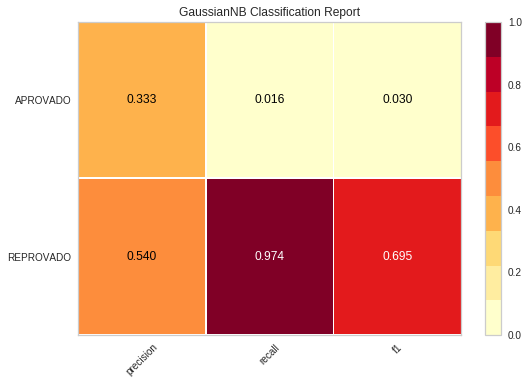

In [114]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=["REPROVADO", "APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


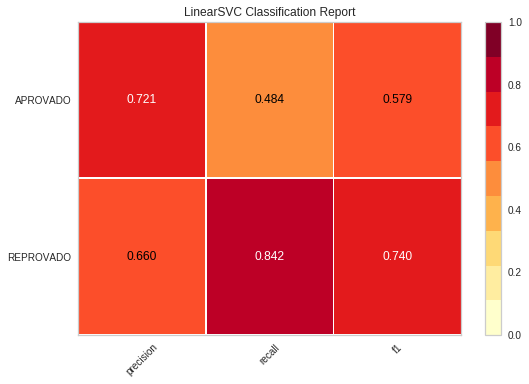

In [116]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=["REPROVADO", "APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

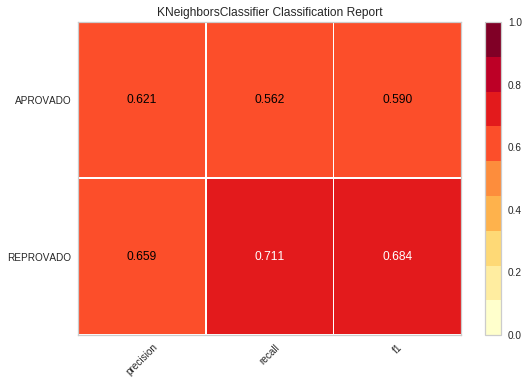

In [115]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=["REPROVADO","APROVADO"])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

# Todos os campos pra serem treinados

In [0]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
datasetBayes["notaProva1"]                     = le.fit_transform(datasetBayes["notaProva1"])
datasetBayes["questoesFeitasProva1"]           = le.fit_transform(datasetBayes["questoesFeitasProva1"])
datasetBayes["quantidadeProva1"]               = le.fit_transform(datasetBayes["quantidadeProva1"])
datasetBayes["notaProva2"]                     = le.fit_transform(datasetBayes["notaProva2"])
datasetBayes["questoesFeitasProva2"]           = le.fit_transform(datasetBayes["questoesFeitasProva2"])
datasetBayes["quantidadeProva2"]               = le.fit_transform(datasetBayes["quantidadeProva2"])
datasetBayes["mediaProvas"]                    = le.fit_transform(datasetBayes["mediaProvas"])
datasetBayes["situacao"]                       = le.fit_transform(datasetBayes["situacao"])
datasetBayes["qsub1"]                          = le.fit_transform(datasetBayes["qsub1"])
datasetBayes["qsub2"]                          = le.fit_transform(datasetBayes["qsub2"])
datasetBayes["qsub3"]                          = le.fit_transform(datasetBayes["qsub3"])
datasetBayes["qsub4"]                          = le.fit_transform(datasetBayes["qsub4"])
datasetBayes["qsub5"]                          = le.fit_transform(datasetBayes["qsub5"])
datasetBayes["qsubp1"]                         = le.fit_transform(datasetBayes["qsubp1"])
datasetBayes["qsubp2"]                         = le.fit_transform(datasetBayes["qsubp2"])
datasetBayes["totalsub"]                       = le.fit_transform(datasetBayes["totalsub"])
datasetBayes["igualACeml123"]                  = le.fit_transform(datasetBayes["igualACeml123"])
datasetBayes["igualACeml45"]                   = le.fit_transform(datasetBayes["igualACeml45"])
datasetBayes["qsemana1"]                       = le.fit_transform(datasetBayes["qsemana1"])
datasetBayes["qsemana2"]                       = le.fit_transform(datasetBayes["qsemana2"])
datasetBayes["qsemana3"]                       = le.fit_transform(datasetBayes["qsemana3"])
datasetBayes["qsemana4"]                       = le.fit_transform(datasetBayes["qsemana4"])
datasetBayes["qsemana5"]                       = le.fit_transform(datasetBayes["qsemana5"])
datasetBayes["qsemana6"]                       = le.fit_transform(datasetBayes["qsemana6"])
datasetBayes["qsemana7"]                       = le.fit_transform(datasetBayes["qsemana7"])
datasetBayes["qsemana8"]                       = le.fit_transform(datasetBayes["qsemana8"])
datasetBayes["submeteu1"]                      = le.fit_transform(datasetBayes["submeteu1"])
datasetBayes["submeteu2"]                      = le.fit_transform(datasetBayes["submeteu2"])
datasetBayes["submeteu3"]                      = le.fit_transform(datasetBayes["submeteu3"])
datasetBayes["submeteu4"]                      = le.fit_transform(datasetBayes["submeteu4"])
datasetBayes["submeteu5"]                      = le.fit_transform(datasetBayes["submeteu5"])
datasetBayes["submeteu6"]                      = le.fit_transform(datasetBayes["submeteu6"])
datasetBayes["submeteu7"]                      = le.fit_transform(datasetBayes["submeteu7"])
datasetBayes["submeteu8"]                      = le.fit_transform(datasetBayes["submeteu8"])
datasetBayes["madrugada	"]                     = le.fit_transform(datasetBayes["madrugada"])
datasetBayes["manha"]                          = le.fit_transform(datasetBayes["manha"])
datasetBayes["tarde"]                          = le.fit_transform(datasetBayes["tarde"])
datasetBayes["noite"]                          = le.fit_transform(datasetBayes["noite"])

datasetBayes.head()